# Workshop 3: Upload to Data Lake

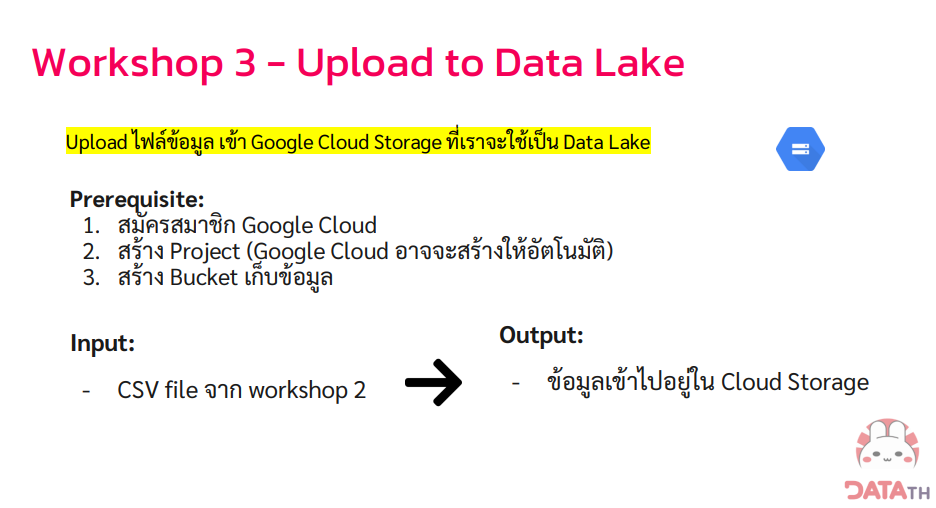

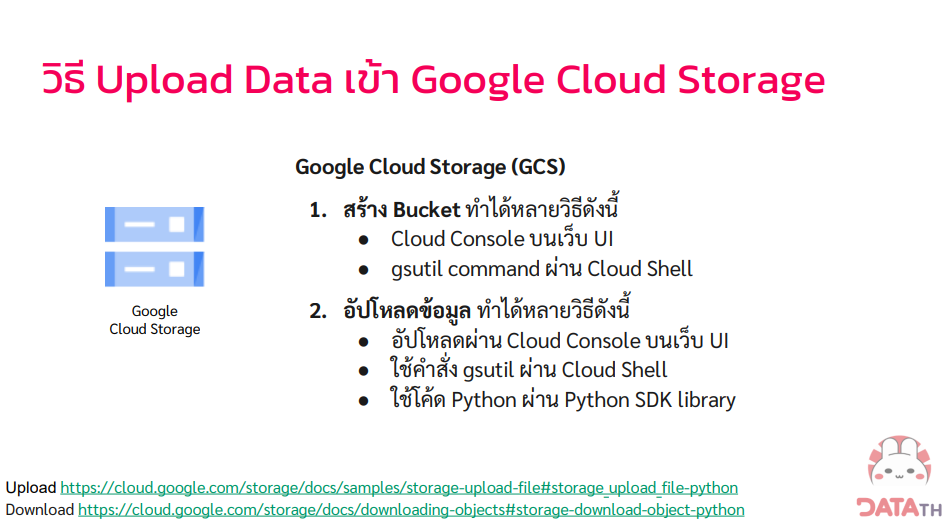

## 1. สร้าง Bucket

### 1.1 สร้าง Bucket ด้วย UI

* ตั้งชื่อ Bucket ว่า ` r2de2-data-lake `

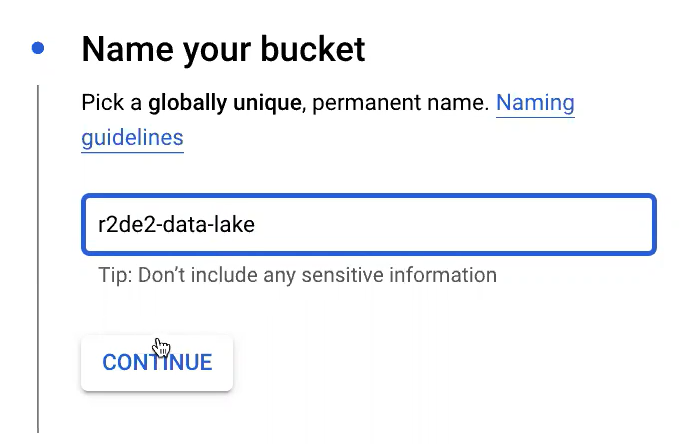

* เลือกเก็บข้อมูลไว้ที่ ` asia-siutheast1 (Singapore)`

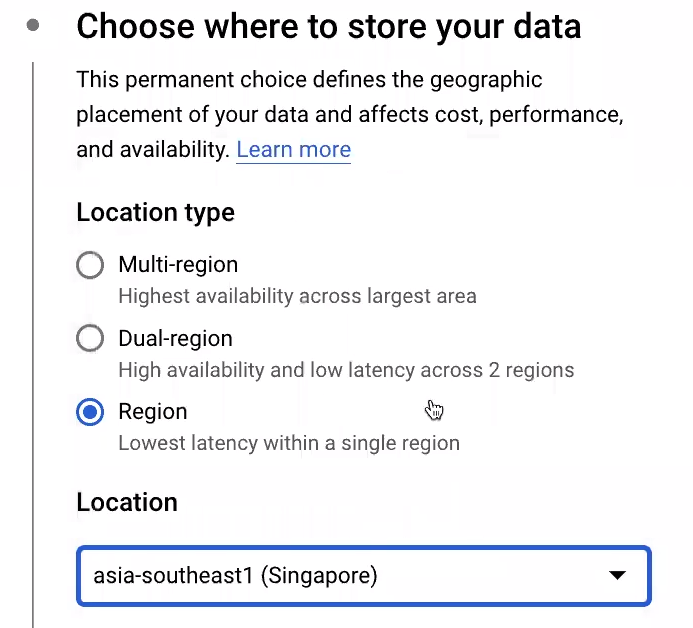

* Storage class เลือก ` Standard `

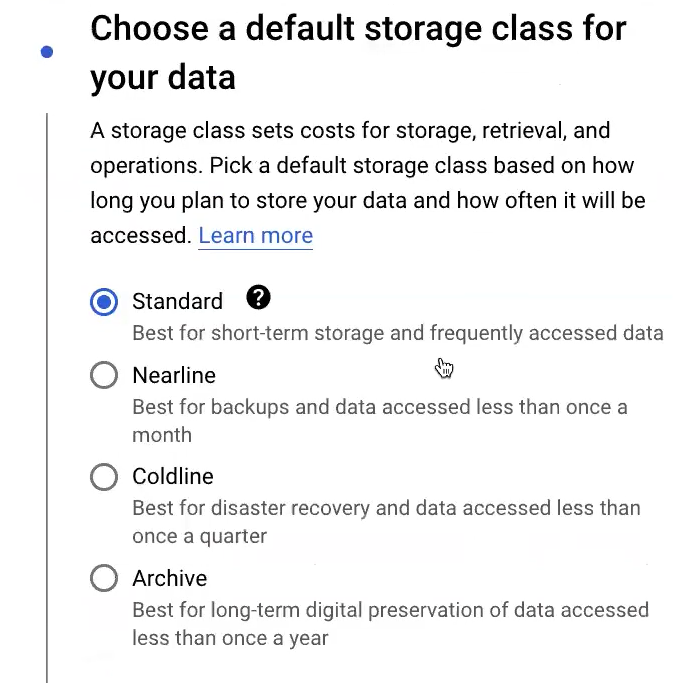

* Access control เลือก ` Uniform `

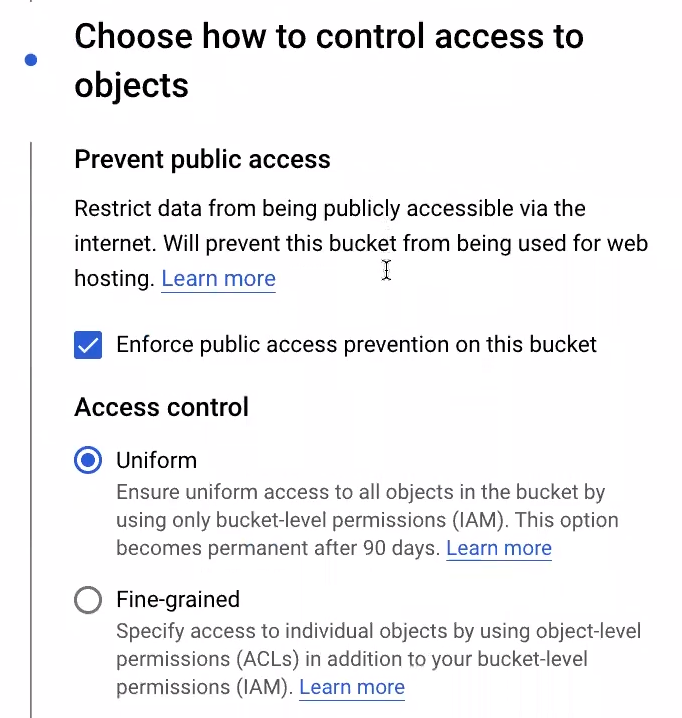

* Advanced settings เลือก ` Google-managed encryption key `

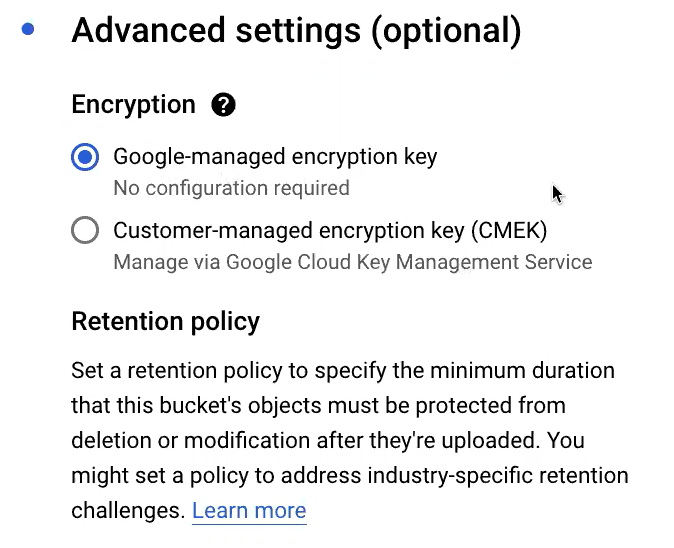

* สร้าง Bucket ด้วย UI สำเร็จ

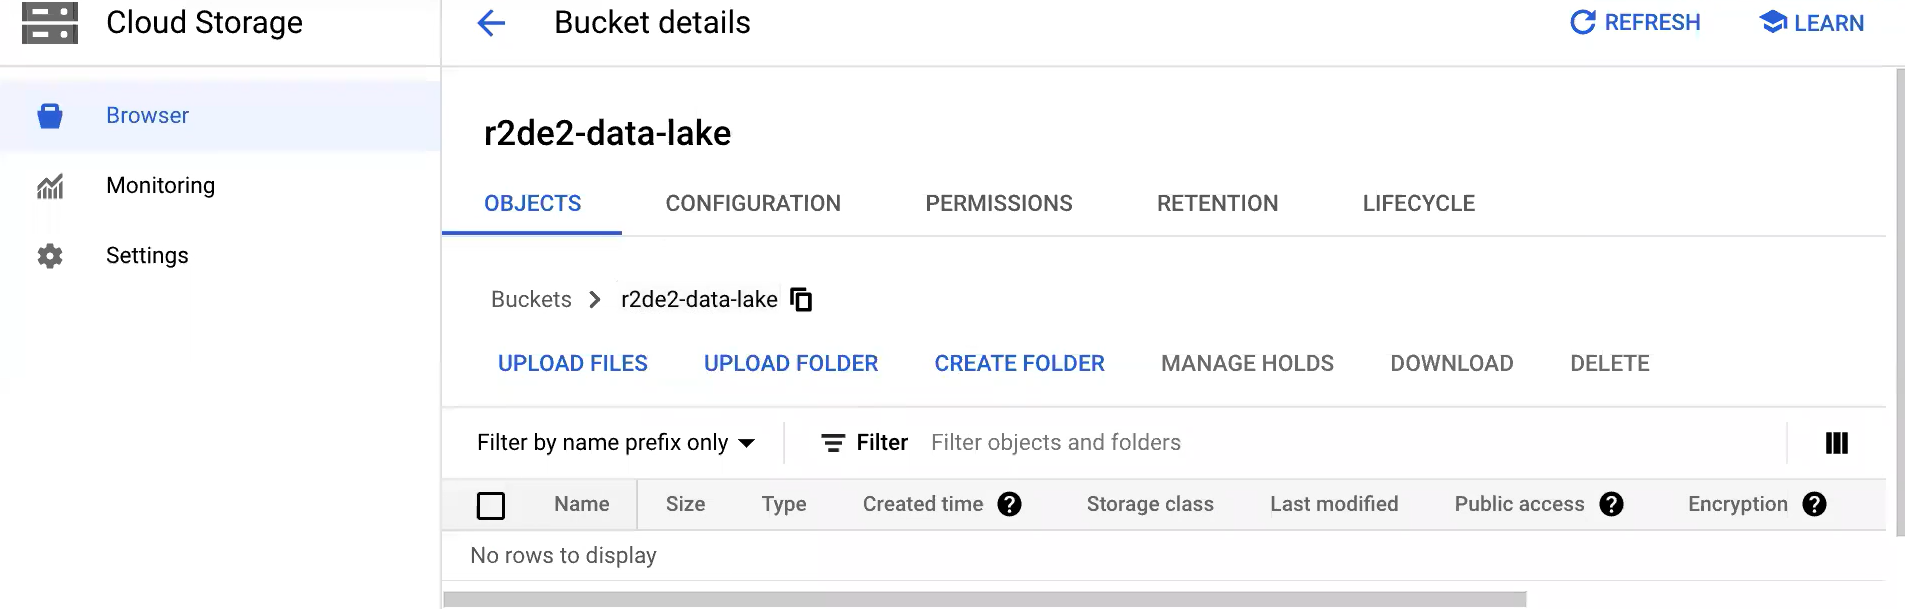

### 1.2 สร้าง Bucket ด้วย Command line
* Create buckets https://cloud.google.com/storage/docs/creating-buckets#storage-create-bucket-gsutil
* gsutil https://gist.github.com/fonylew/3ada58ed64b78c5e886d5f5d96a15487
* เข้าไปที่ Cloud shell และพิมพ์ Command line เพื่อสร้าง Bucket
```
gsutil mb -p <PROJECT_ID> -c <STORAGE_CLASS> -l <BUCKET_LOCATION> -b on gs://<BUCKET_NAME>
```

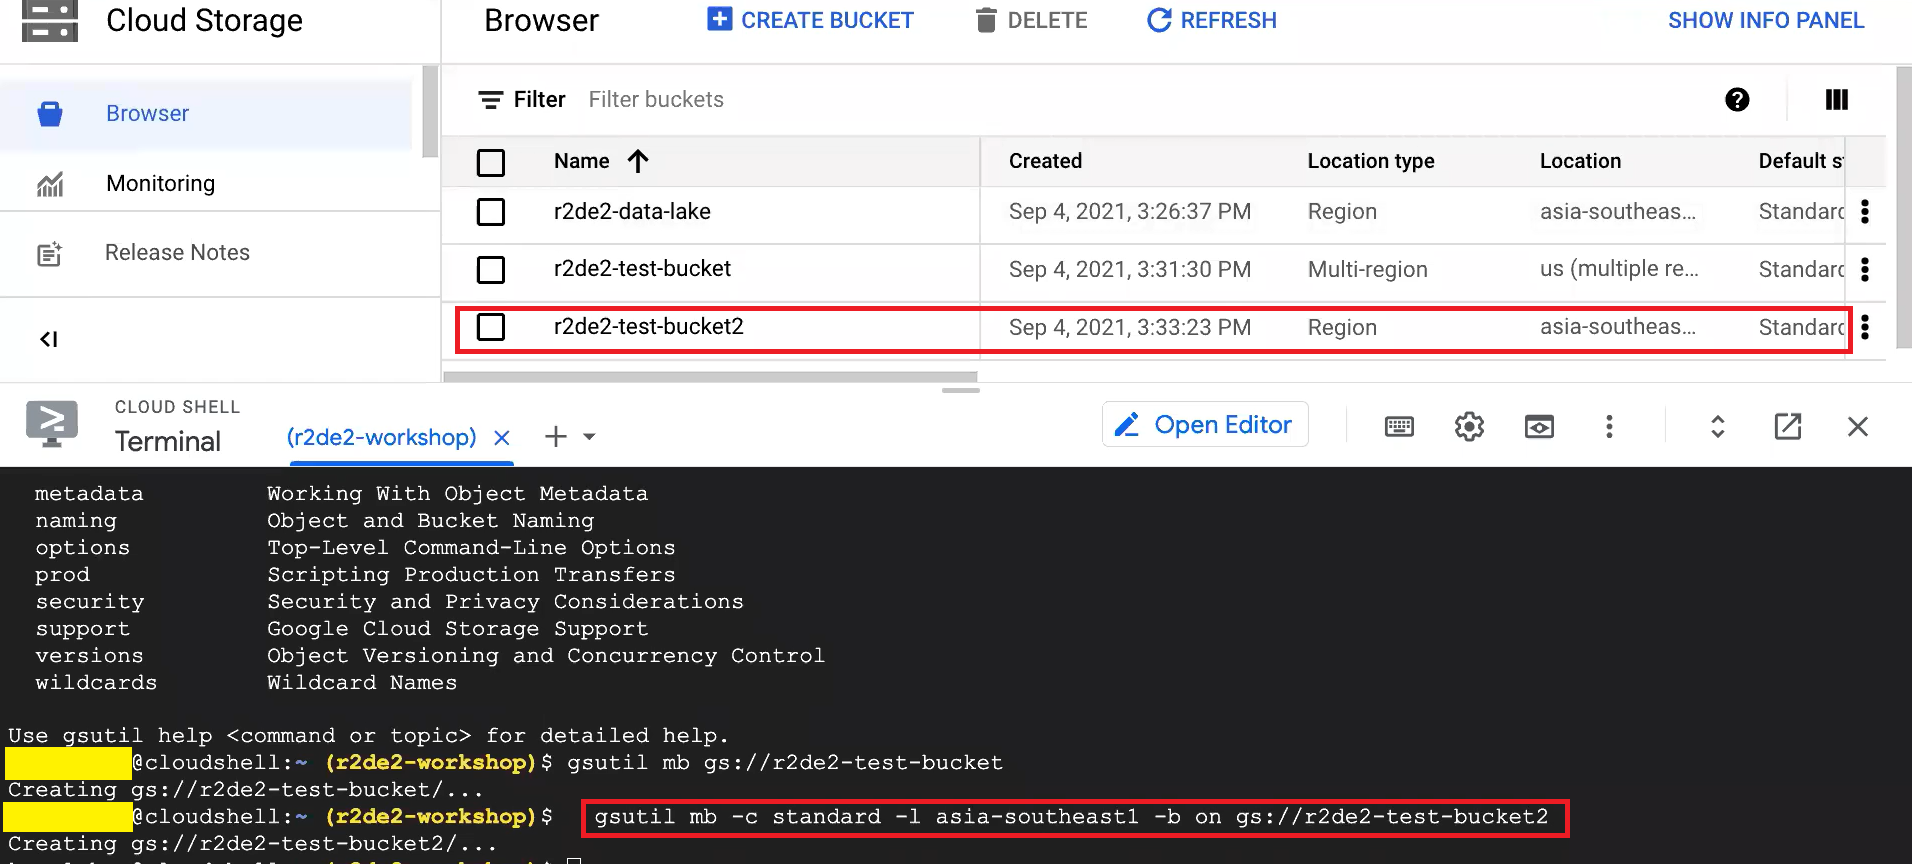

## 2. Upload file

### 2.1 Upload ด้วย UI
* เข้าไปที่ Bucket สามารถเลือก
 * `UPLOADFILES`  เพื่อ Upload file
 * `UPLOADFOLDER` เพื่อ Upload folder
 * `CREATEFOLDER` เพื่อ create folder

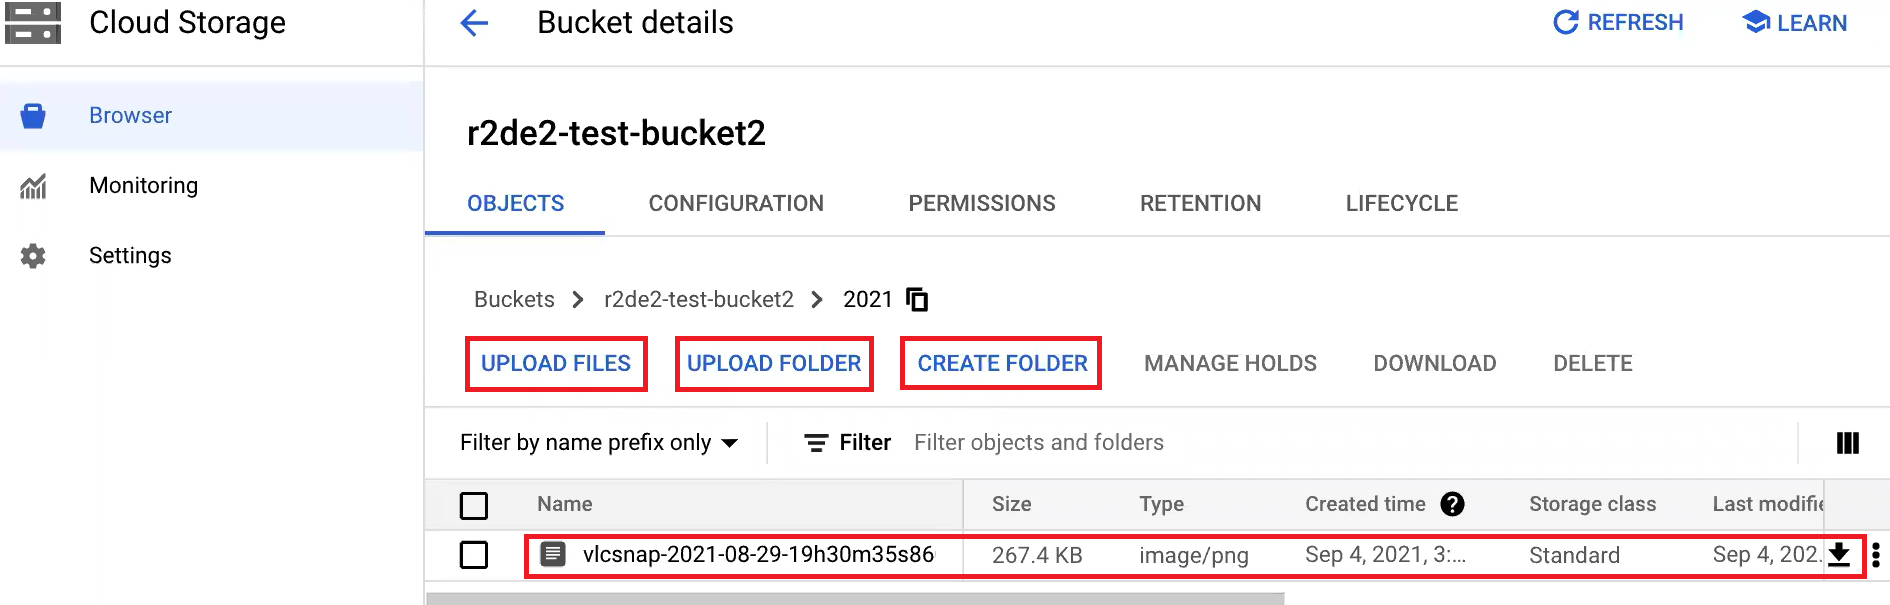

### 2.2 Upload ด้วย Command line

* Download file เข้าสู่ cloud shell และใช้ OPTION สำหรับตั้งชื่อ โดยใช้ชื่อว่า "`data.zip`"
```
wget [-O OUTPUT_NAME] [URL]
```

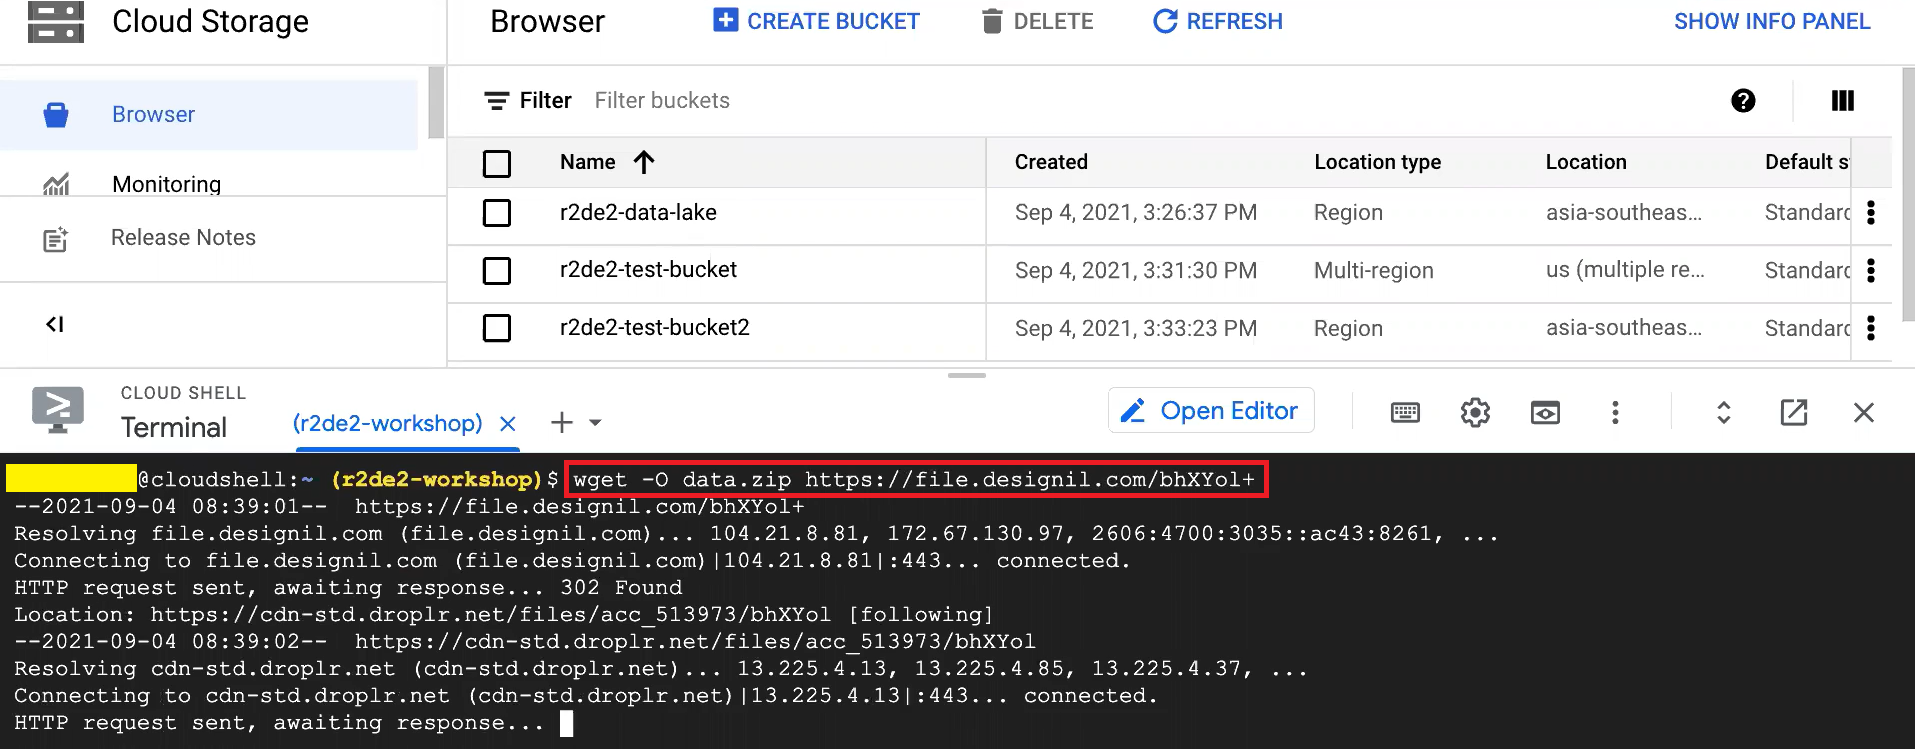

* Unzip โดยเราจะได้ไฟล์ชื่อว่า "ws2-output.csv"
```
unzip [ZIP_FILE]
```

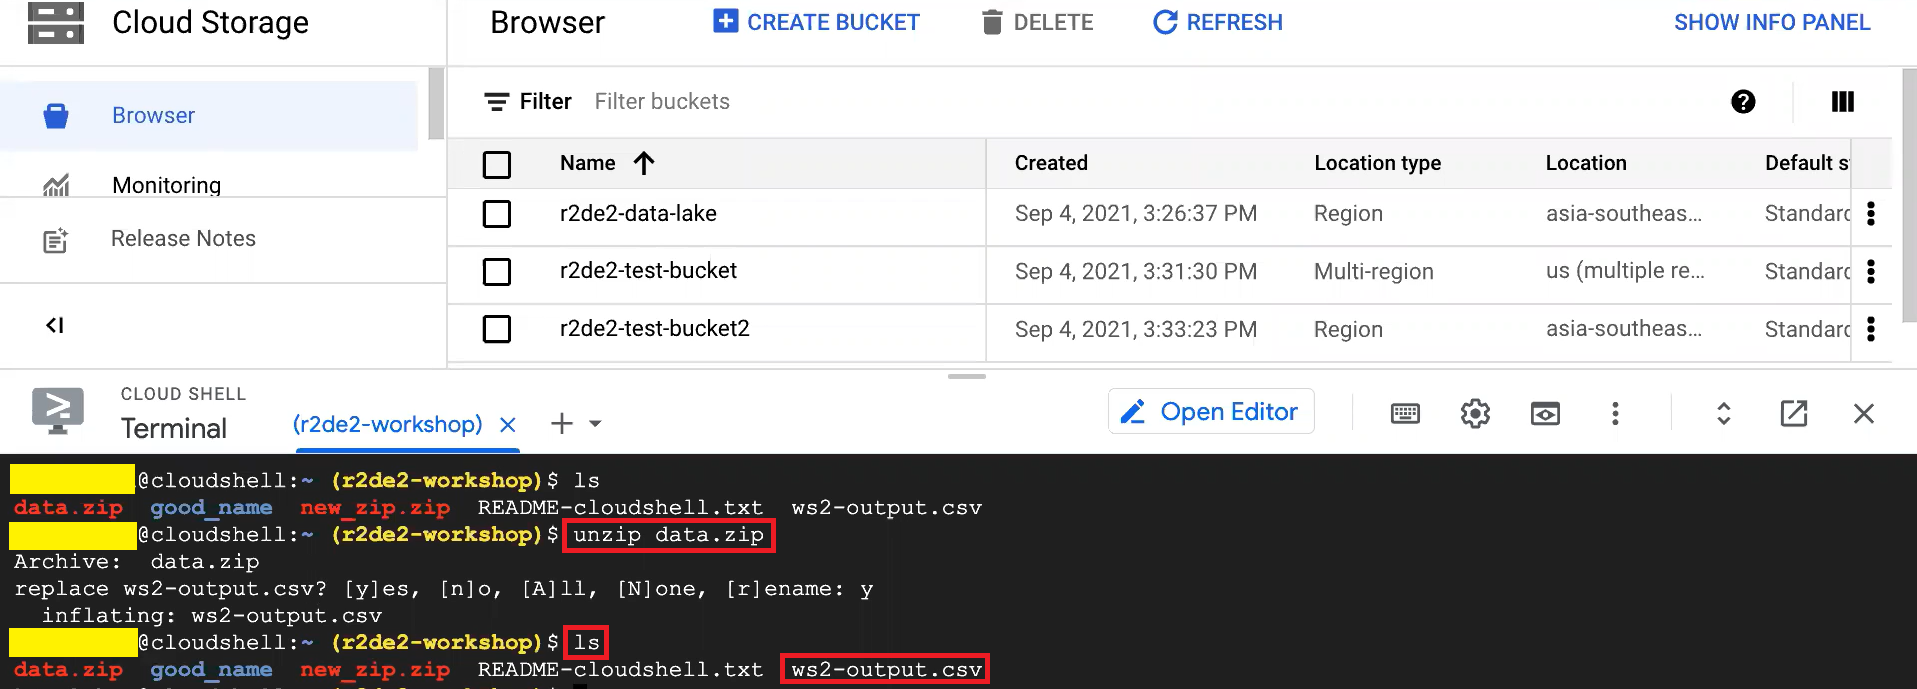

* Upload "ws2-output.csv" เข้าไปใน bucket
```
gsutil cp [File] gs://[BUCKET]
```

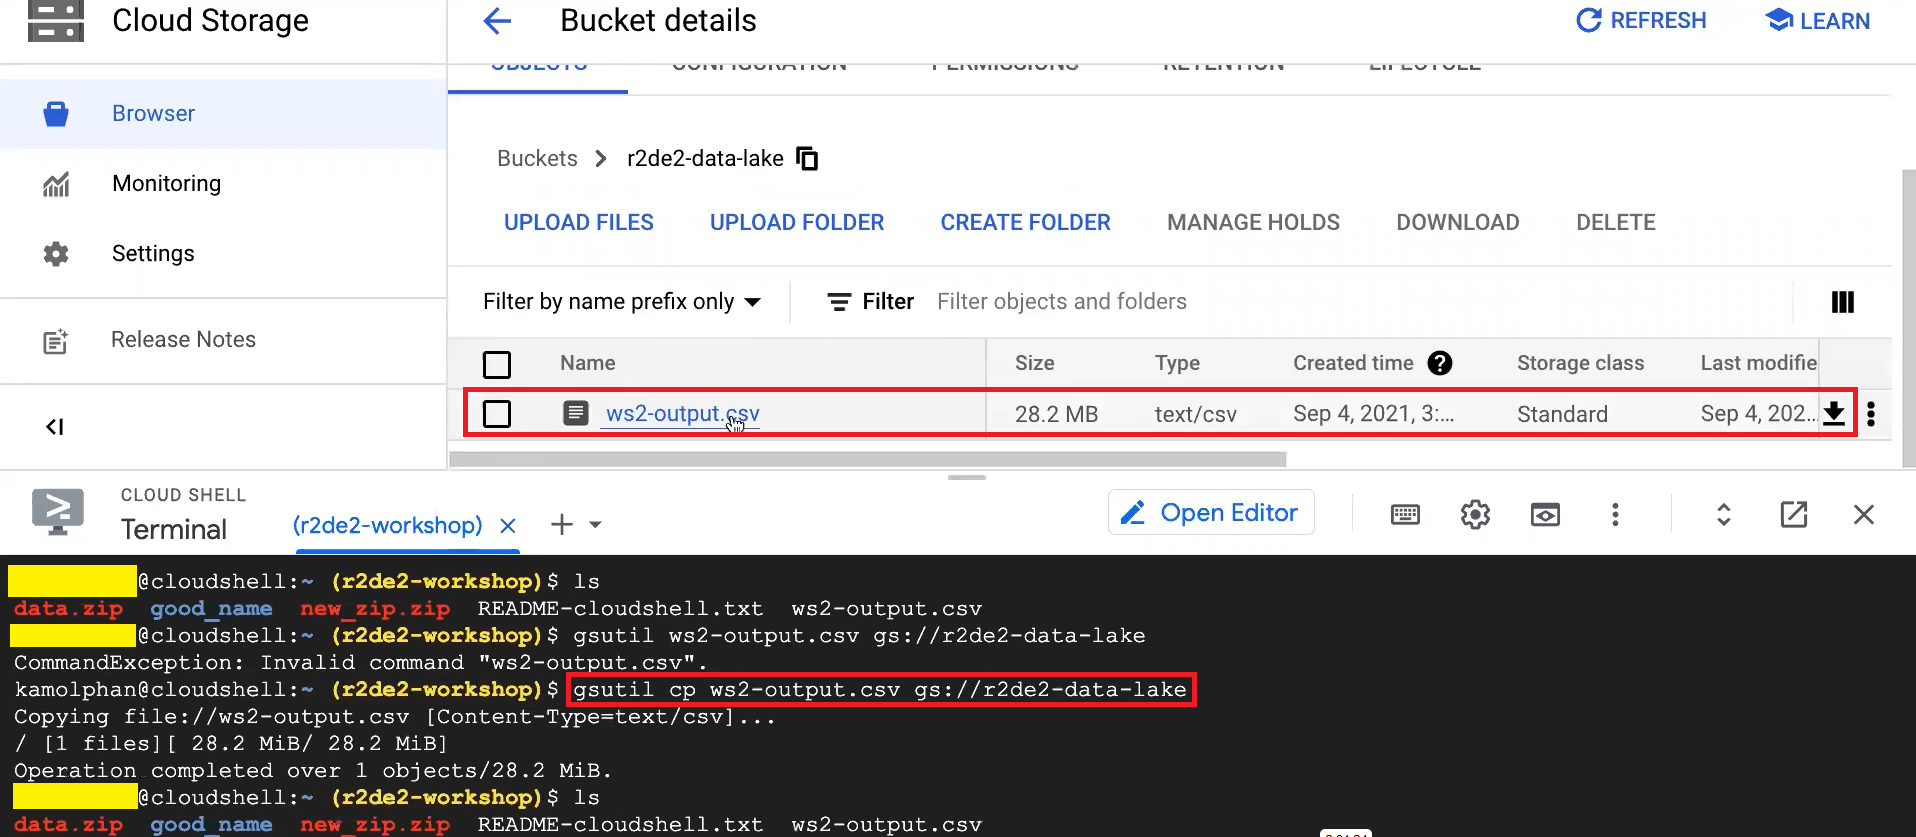

* Download "output.csv" จากใน Bucket ให้มาอยู่ที่ Cloud shell โดยให้มีไฟล์ว่า "download.csv"
```
gsutil -m cp gs://[BUCKET]/path/to/file [File]
```

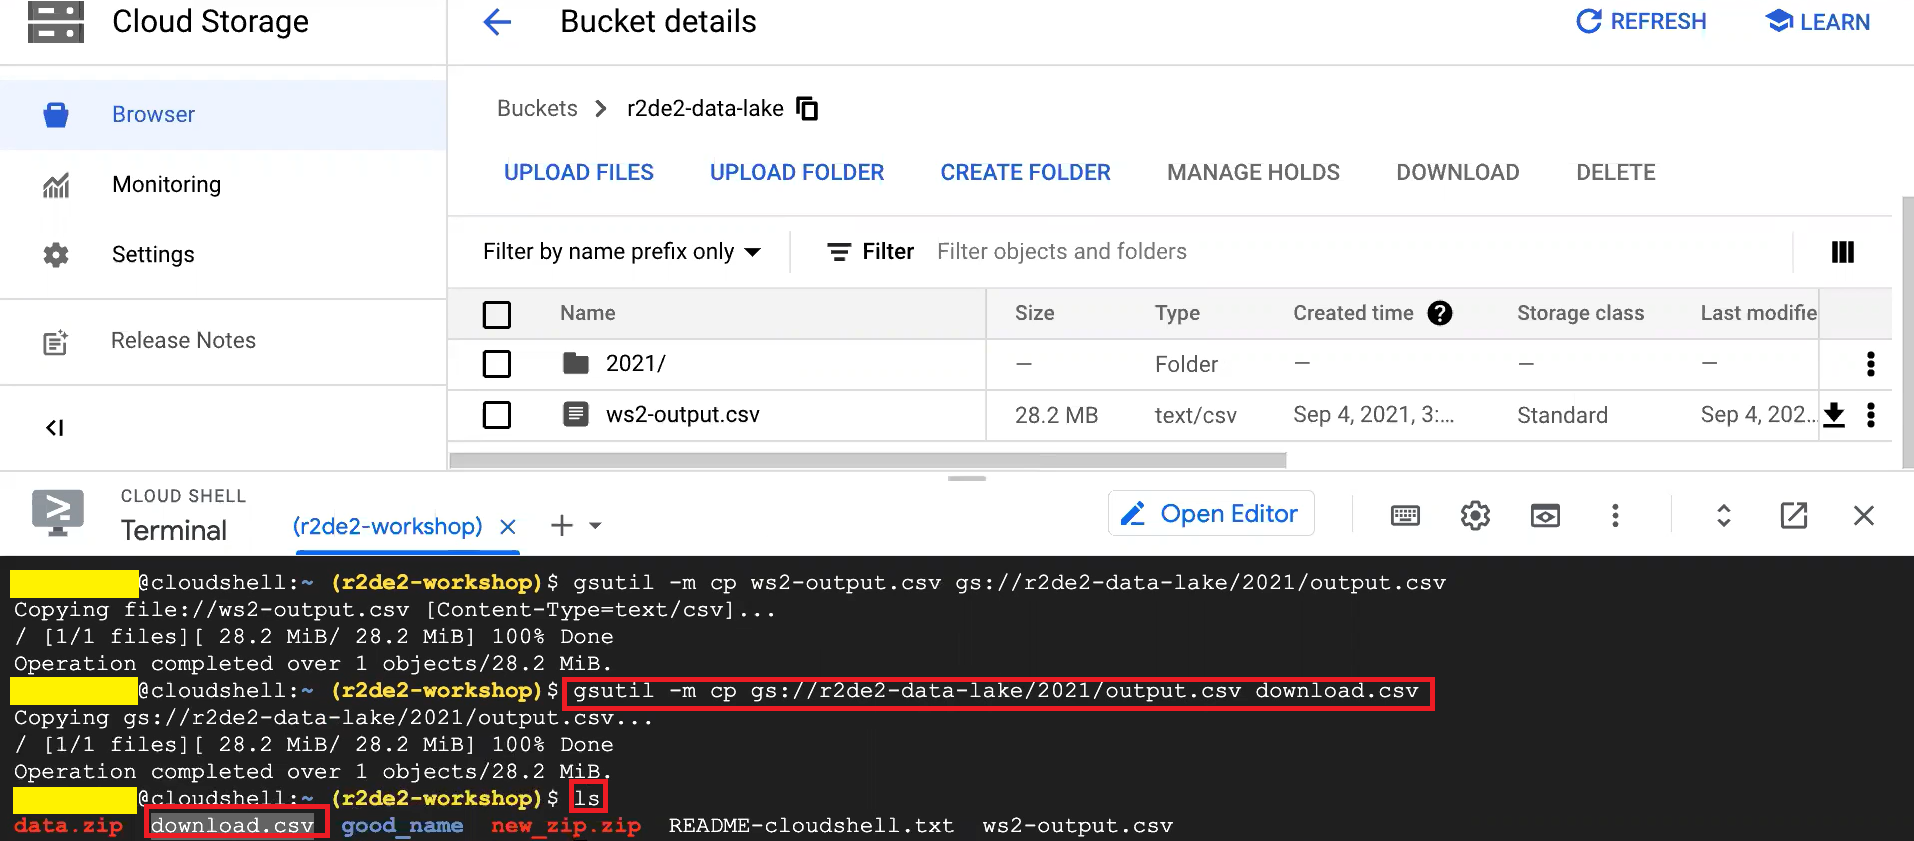

### 2.3 Upload ด้วย Code Python
* Upload https://cloud.google.com/storage/docs/samples/storage-upload-file#storage_upload_file-python
* Download https://cloud.google.com/storage/docs/downloading-objects#client-libraries-download-object

* สร้าง File ที่ใช้ในการ Upload โดย code มีดังนี้

In [ ]:
from google.cloud import storage

def upload_blob(bucket_name, source_file_name, destination_blob_name):
    """Uploads a file to the bucket."""
    # The ID of your GCS bucket
    # bucket_name = "your-bucket-name"
    # The path to your file to upload
    # source_file_name = "local/path/to/file"
    # The ID of your GCS object
    # destination_blob_name = "storage-object-name"

    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(destination_blob_name)
    blob.upload_from_filename(source_file_name)

    print(
        "File {} uploaded to {}.".format(
            source_file_name, destination_blob_name
        )
    )

if __name__ == "__main__":
    upload_blob(
        bucket_name="r2de2-data-lake",
        source_file_name="ws2_output.csv",
        destination_blob_name="Workshop2_output/output.csv"
    )


* นำ File ไปไว้ใน Cloud shell
* ใช้คำสั่ง Run Python จะพบ "output.csv" เข้ามาอยู่ใน bucket เรียบร้อย

```
python3 [FILENAME]

```

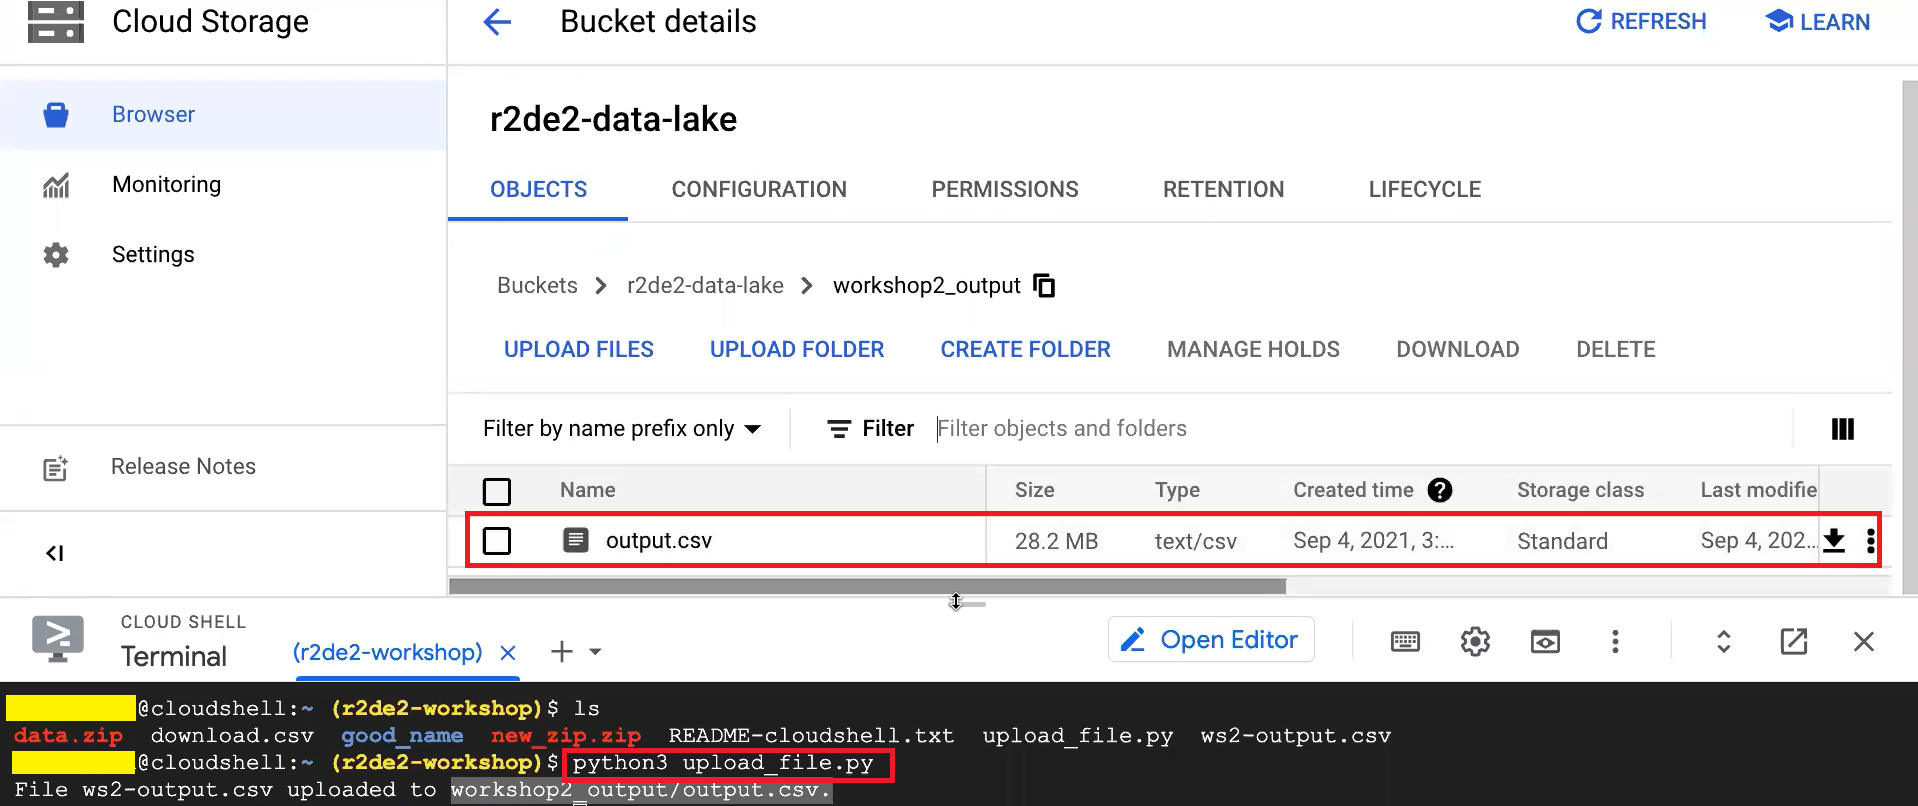

* สร้าง File ที่ใช้ในการ Download โดย code มีดังนี้

In [ ]:
from google.cloud import storage

def download_blob(bucket_name, source_blob_name, destination_file_name):
    """Downloads a blob from the bucket."""
    # The ID of your GCS bucket
    # bucket_name = "your-bucket-name"

    # The ID of your GCS object
    # source_blob_name = "storage-object-name"

    # The path to which the file should be downloaded
    # destination_file_name = "local/path/to/file"

    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)

    # Construct a client side representation of a blob.
    # Note `Bucket.blob` differs from `Bucket.get_blob` as it doesn't retrieve
    # any content from Google Cloud Storage. As we don't need additional data,
    # using `Bucket.blob` is preferred here.
    blob = bucket.blob(source_blob_name)
    blob.download_to_filename(destination_file_name)

    print(
        "Downloaded storage object {} from bucket {} to local file {}.".format(
            source_blob_name, bucket_name, destination_file_name
        )
    )

def upload_blob(bucket_name, source_file_name, destination_blob_name):
    """Uploads a file to the bucket."""
    # The ID of your GCS bucket
    # bucket_name = "your-bucket-name"
    # The path to your file to upload
    # source_file_name = "local/path/to/file"
    # The ID of your GCS object
    # destination_blob_name = "storage-object-name"

    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(destination_blob_name)
    blob.upload_from_filename(source_file_name)

    print(
        "File {} uploaded to {}.".format(
            source_file_name, destination_blob_name
        )
    )

if __name__ == "__main__":
    upload = input("Upload (u) or Download (d)?")
    file_name = input("What's local name to : ")        # ws2_output.csv
    gcs_file_name = input("What's gcs file name: ")     # Workshop3_output/output.csv

    bucket_name = "r2de2-data-lake"

    if upload.lower() == "upload" or upload.lower() == "u":
        upload_blob(
            bucket_name=bucket_name,
            source_file_name=file_name,
            destination_blob_name=gcs_file_name
        )
    elif upload.lower() == "download" or upload.lower() == "d":
        download_blob(
            bucket_name=bucket_name,
            source_blob_name=gcs_file_name,
            destination_file_name=file_name
        )
    else:
        print("Please input upload (u) or download (d)")


* นำ File ไปไว้ใน Cloud shell
* ใช้คำสั่ง Run Python เพื่อ download "new_upload.csv" จากใน bucket ให้มาอยู่ที่ Cloud shell โดยให้มีไฟล์ว่า "workshop3_download.csv"

```
python3 [FILENAME]

```

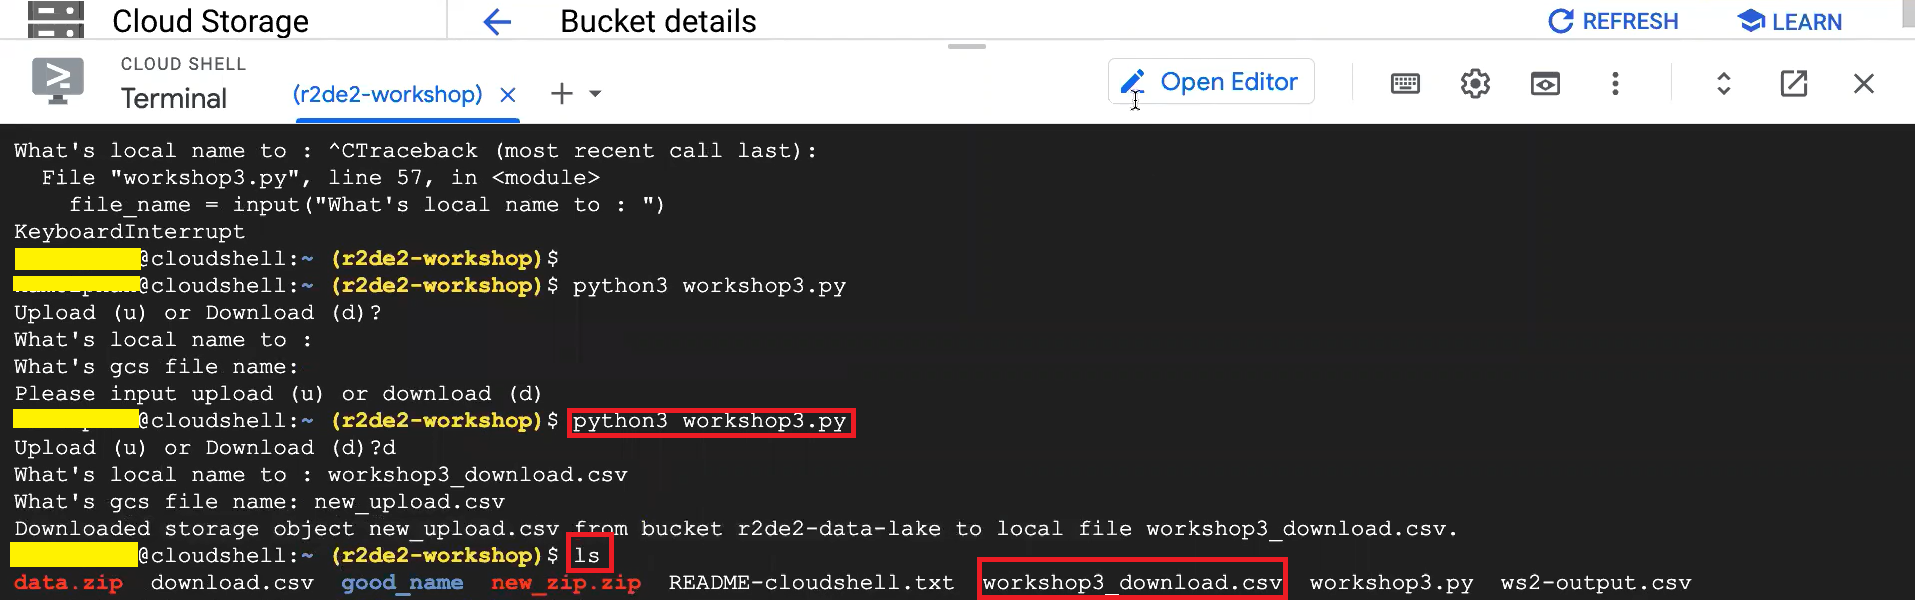

_**จบ Workshop 3**_